In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
import math
from glob import glob

def to_screen(name, file):
    cv.imshow(name, file)  
    cv.waitKey(0)
    cv.destroyAllWindows()  

# Exercise 1 

### Assignment 1: filterbank of DoG filters
TODO: vanaf dog2 in een hulp functie steken

In [28]:
def create_and_show_dog(dog, angle, dog_filters):
    rows,cols = dog.shape
    new_dog = dog.copy()
    M = cv.getRotationMatrix2D((7, 7), angle, 1)
    new_dog = cv.warpAffine(new_dog, M, (cols,rows))
    ax = sns.heatmap(new_dog)
    plt.show()
    dog_filters.append(new_dog)

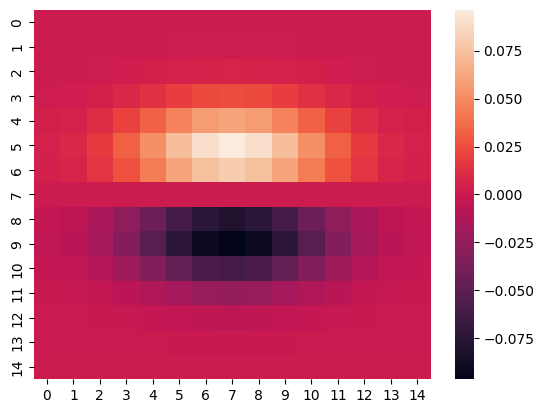

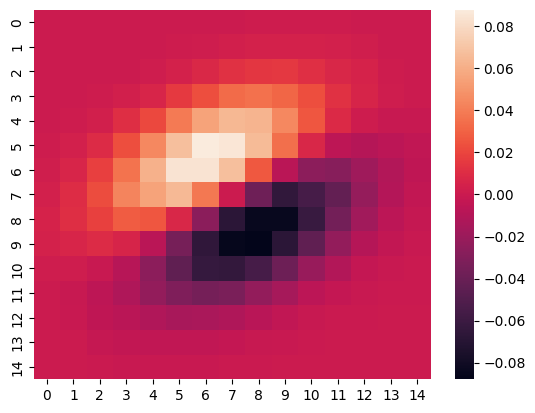

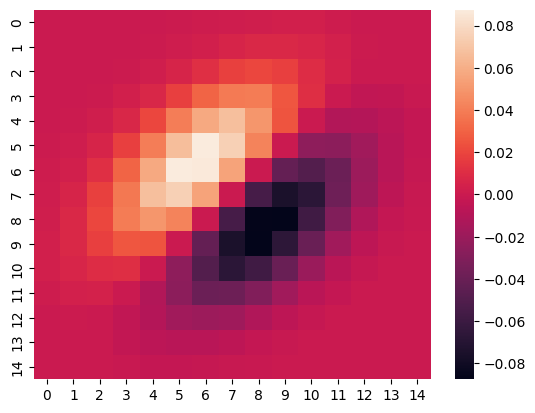

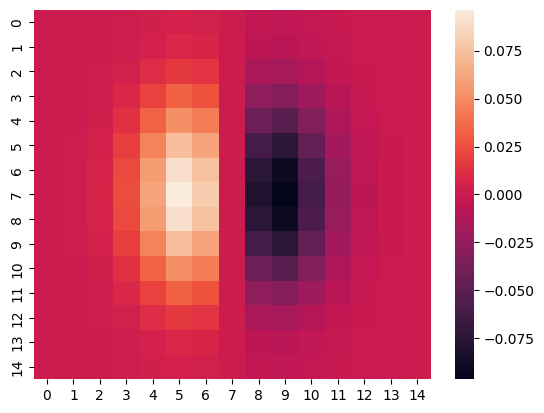

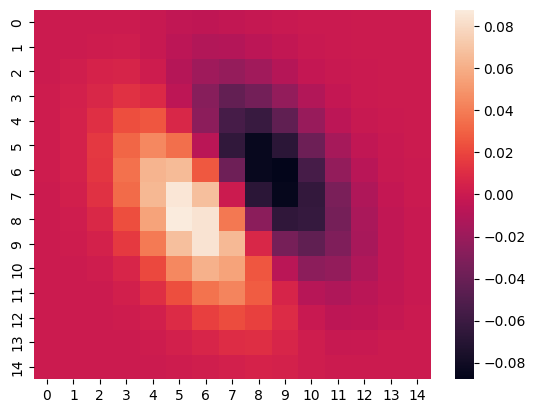

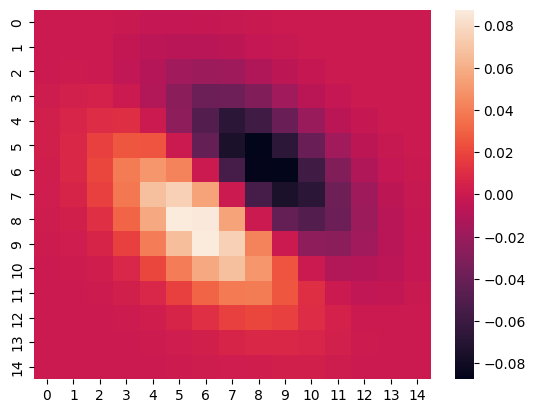

In [31]:
ksize = 15
sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8
ddepth = cv.CV_32F

### step 1
# Creates a 1-D Gaussian kernel 
kernel = cv.getGaussianKernel(ksize, sigma, cv.CV_32F)
square = np.zeros((15,15), dtype="float32")
square[7,:] = kernel.flatten()

### step 2
kernel2 = cv.getGaussianKernel(ksize, sigma-1, cv.CV_32F)
filter = cv.filter2D(square, -1, kernel2)

dog_filters = []
### filter 1
dog1 = cv.Sobel(filter, ddepth, 0, 1, ksize=3)
ax = sns.heatmap(dog1)
plt.show()
dog_filters.append(dog1)


angles = [30,45,90,120,135]
for i in range(len(angles)):
    create_and_show_dog(dog1, angles[i], dog_filters)



### Assignment 2

In [23]:
sources = sorted(glob("../afbeeldingen/road?.png"))
filtered_results = []


for i in range(len(sources)):
    
    filter1 = dog_filters[i]
    im = cv.imread(sources[i])

    gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    gray_float = gray.astype("float32")
    filtered = cv.filter2D(gray_float, -1, filter1)

    # abs_filtered = np.abs(filtered)
    # clipped_filtereds = np.clip(abs_filtered,0,255)
    # filtered_uint8 = clipped_filtereds.astype("uint8")
    # to_screen("test", filtered)

    filtered_results.append(filtered)
    


float32
